In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from substrate_helpers import *

In [52]:
import sqlite3
import re
import datetime
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from REST_API.database_queries import update_db

In [5]:
from substrateinterface import SubstrateInterface, Keypair
from substrateinterface.exceptions import SubstrateRequestException

substrate = SubstrateInterface(
    url="ws://127.0.0.1:9944",
    ss58_format=42,
    type_registry_preset='kusama'
)

In [6]:
con = sqlite3.connect('postthreadV1_write.db')
# con = sqlite3.connect('test1.db')
cur = con.cursor()

# Create a more interconnected social graph for existing users

In [54]:
df_users = pd.read_sql_query("""SELECT * FROM user""", con)

In [55]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   msa_id               538 non-null    int64 
 1   username             538 non-null    object
 2   password             538 non-null    object
 3   profile_pic          538 non-null    object
 4   wallet_ss58_address  538 non-null    object
 5   block_number         538 non-null    int64 
 6   msa_id_from_query    538 non-null    int64 
 7   provider_key         538 non-null    object
 8   date_minted          538 non-null    object
dtypes: int64(3), object(6)
memory usage: 38.0+ KB


In [57]:
for idx1, row1 in df_users.iterrows():
    for idx2, row2 in df_users.sample(min(100,len(df_users))).iterrows():
        follow_user(row1['msa_id_from_query'], row2['msa_id_from_query'])

Failed to send: {'code': 1016, 'message': 'Immediately Dropped', 'data': "The transaction couldn't enter the pool because of the limit"}
Failed to send: {'code': 1016, 'message': 'Immediately Dropped', 'data': "The transaction couldn't enter the pool because of the limit"}



KeyboardInterrupt



# Calculate social score

In [ ]:
df = pd.read_sql_query("""SELECT * FROM follow""", con)

In [ ]:
df.info()

In [ ]:
G = nx.Graph()
G.add_edges_from(df[['protagonist_msa_id', 'antagonist_msa_id']].values.tolist())

for user_msa_id in df['protagonist_msa_id']:
    degree_scores = nx.degree_centrality(G)
    closeness_scores = nx.closeness_centrality(G)
    betweeness_scores = nx.betweenness_centrality(G)
    
    degree_max = max(degree_scores.values())
    closeness_max = max(closeness_scores.values())
    betweeness_max = max(betweeness_scores.values())
    
    degree_user = 0 if degree_max == 0 else degree_scores[user_msa_id] / degree_max
    closeness_user = 0 if closeness_max == 0 else closeness_scores[user_msa_id] / closeness_max
    betweeness_user = 0 if betweeness_max == 0 else betweeness_scores[user_msa_id] / betweeness_max
    
    centralities = [degree_user, closeness_user, betweeness_user]
    centralities.sort(reverse=True)
    
    weighted_avg = 0
    for i, score in enumerate(centralities):
        weighted_avg += score * i
        
    weighted_avg = weighted_avg / 6
    print(user_msa_id, weighted_avg)

NetworkXError: Node 97 has no position.

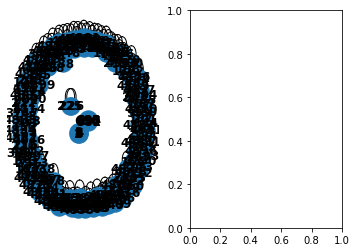

In [53]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')